In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np
from getpass import getpass
import psycopg2
import pandas.io.sql as sqlio

In [25]:
accidents_by_cause2020  = pd.read_csv('/Users/anastasiasadova/Desktop/files_git/accidents_by_cause2020edited.csv')

In [26]:
accidents_by_cause2020.dtypes

Case_Number                  object
District_Name                object
Neighborhood_Name            object
Street_Name                  object
Day_of_Week                  object
Year                          int64
Month_Number                  int64
Month_Name                   object
Day_of_Month                  int64
Hour_of_Day                   int64
Driver_Cause_Description     object
Shift_Description            object
Coordenada_UTM_X_ED50       float64
Coordenada_UTM_Y_ED50       float64
Longitud                    float64
Latitud                     float64
datetime                     object
dtype: object

In [27]:
accidents_by_cause2020

,Case_Number,District_Name,Neighborhood_Name,Street_Name,Day_of_Week,Year,Month_Number,Month_Name,Day_of_Month,Hour_of_Day,Driver_Cause_Description,Shift_Description,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud,Latitud,datetime
0,2020S001281,Unknown,Unknown,Corts Catalanes,Wednesday,2020,2,February,19,22,Disobeying traffic lights,Night,432561.42,4584522.58,2.193119,41.409423,2020-02-19 22:00:00
1,2020S002367,Unknown,Unknown,Molins de Rei,Saturday,2020,5,May,30,12,Others,Morning,422891.03,4584730.23,2.077403,41.410423,2020-05-30 12:00:00
2,2020S005723,Sant Martí,el Camp de l'Arpa del Clot,Independència,Wednesday,2020,12,December,2,13,Others,Morning,431461.53,4584551.41,2.179957,41.409589,2020-12-02 13:00:00
3,2020S000847,Sant Martí,el Camp de l'Arpa del Clot,Còrsega,Tuesday,2020,2,February,4,6,Lack of attention while driving,Morning,431597.10,4585085.49,2.181518,41.414411,2020-02-04 06:00:00
4,2020S003120,Sant Martí,el Camp de l'Arpa del Clot,Independència,Monday,2020,7,July,13,14,Disobeying traffic lights,Afternoon,431372.38,4585035.95,2.178835,41.413946,2020-07-13 14:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6251,2020S000959,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Saturday,2020,2,February,8,6,Improper or careless turn,Morning,431926.84,4586869.18,2.185263,41.430504,2020-02-08 06:00:00
6252,2020S000242,Nou Barris,Vilapicina i la Torre Llobeta,Escòcia,Sunday,2020,1,January,12,20,Others,Afternoon,431514.05,4586864.21,2.180323,41.430424,2020-01-12 20:00:00
6253,2020S001025,Nou Barris,el Turó de la Peira,Cadí,Monday,2020,2,February,10,9,Lack of precaution when reversing,Morning,430607.68,4587157.78,2.169443,41.432991,2020-02-10 09:00:00
6254,2020S003737,Nou Barris,Porta,Pintor Alsamora,Wednesday,2020,8,August,19,19,Others,Afternoon,431781.49,4587486.66,2.183454,41.436053,2020-08-19 19:00:00


In [28]:
print(accidents_by_cause2020['Case_Number'].duplicated().sum())

0


In [29]:
# Count the top 10 Driver_Cause_Description occurrences
top_10_causes = accidents_by_cause2020['Driver_Cause_Description'].value_counts().head(10)

# Display the result
top_10_causes

Others                                 1433
Lack of attention while driving        1285
Not respecting distances                753
Improper or careless turn               576
Disobeying traffic lights               570
Changing lanes without caution          470
Disobeying other signals                380
Lack of precaution entering traffic     198
Not respecting pedestrian crossings     186
Lack of precaution when reversing       166
Name: Driver_Cause_Description, dtype: int64

In [30]:
# I have decided to show visualisation without others
top_10_causes_filtered = top_10_causes[top_10_causes.index != 'Others']

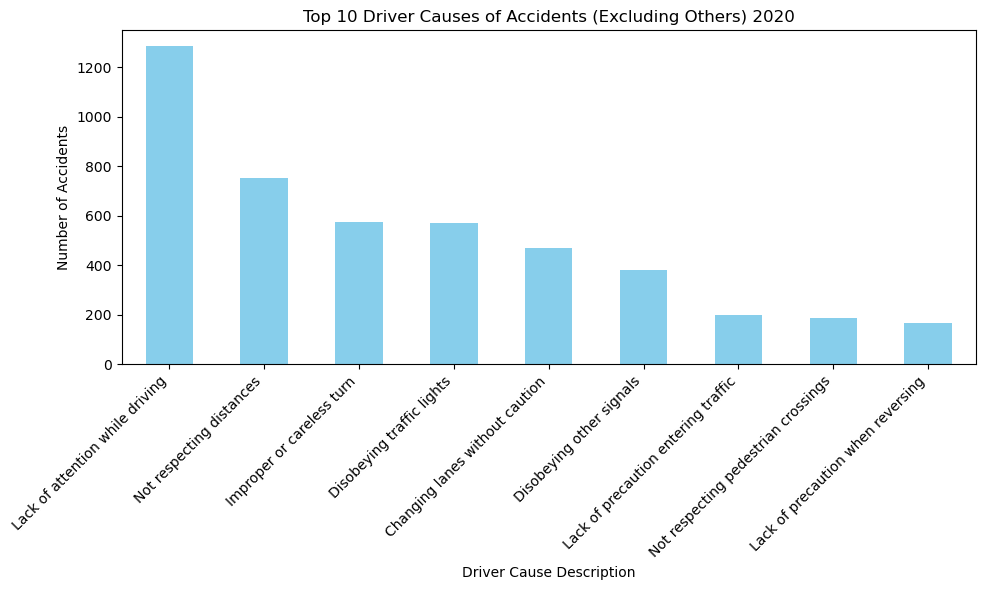

In [31]:
plt.figure(figsize=(10, 6))
top_10_causes_filtered.plot(kind='bar', color='skyblue')
plt.title('Top 10 Driver Causes of Accidents (Excluding Others) 2020')
plt.xlabel('Driver Cause Description')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Group and sum accidents by Street_Name and Driver_Cause_Description
top_streets = (accidents_by_cause2020.groupby(['Street_Name', 'Driver_Cause_Description'])
                     .size()
                     .reset_index(name='Count')
                     .sort_values('Count', ascending=False)
                     .head(20))
top_streets

,Street_Name,Driver_Cause_Description,Count
604,Corts Catalanes,Not respecting distances,88
607,Corts Catalanes,Others,69
600,Corts Catalanes,Lack of attention while driving,62
685,Diagonal,Others,57
100,Aragó,Not respecting distances,51
683,Diagonal,Not respecting distances,51
680,Diagonal,Lack of attention while driving,48
96,Aragó,Improper or careless turn,40
654,Dalt (Besòs),Not respecting distances,39
1291,Litoral (Llobregat),Lack of attention while driving,37


In [33]:
# Most popular street in this data set is Corts Catalanes and
# most common reason for accidents on the street "Corts Catalanes", excluding unspecified causes like "Others"

les_corts_data = accidents_by_cause2020[
    (accidents_by_cause2020['Street_Name'] == 'Corts Catalanes') &
    (accidents_by_cause2020['Driver_Cause_Description'] != 'Others')
]
   
main_cause = les_corts_data['Driver_Cause_Description'].value_counts().idxmax()
main_cause_count = les_corts_data['Driver_Cause_Description'].value_counts().max()

main_cause_count, main_cause

(88, 'Not respecting distances')

In [34]:
top_5_causes = les_corts_data['Driver_Cause_Description'].value_counts().head(5)

In [35]:
top_5_causes

Not respecting distances           88
Lack of attention while driving    62
Changing lanes without caution     33
Disobeying traffic lights          28
Improper or careless turn          27
Name: Driver_Cause_Description, dtype: int64

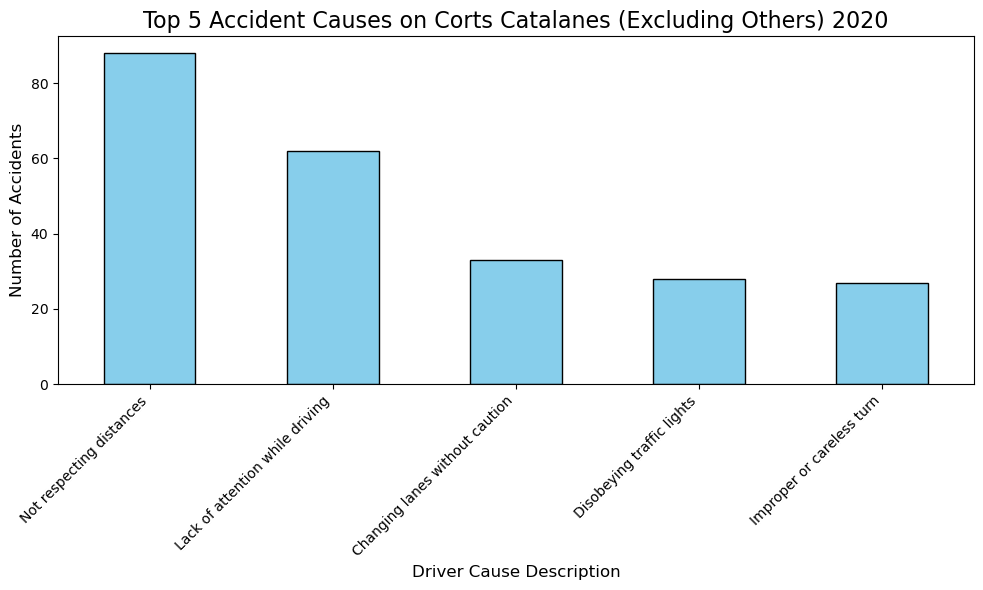

In [36]:
# Filter data for the specific street, excluding 'Others' in 'Driver_Cause_Description'
les_corts_data = accidents_by_cause2020[
    (accidents_by_cause2020['Street_Name'] == 'Corts Catalanes') &
    (accidents_by_cause2020['Driver_Cause_Description'] != 'Others')
]

# Get the top 5 most common causes
top_5_causes_for_granvia = les_corts_data['Driver_Cause_Description'].value_counts().head(5)

# Plot the data
plt.figure(figsize=(10, 6))
top_5_causes_for_granvia.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Top 5 Accident Causes on Corts Catalanes (Excluding Others) 2020', fontsize=16)
plt.xlabel('Driver Cause Description', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
accidents_by_month = accidents_by_cause2020.groupby('Month_Name').size()

accidents_by_month = accidents_by_month.reindex(months_order)

# Plot the data
plt.figure(figsize=(10, 6))
accidents_by_month.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title('Total Accidents by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'months_order' is not defined

In [38]:
# Find the most popular month based on the total number of accidents
most_popular_month = accidents_by_cause2020['Month_Name'].value_counts().idxmax()
most_popular_count = accidents_by_cause2020['Month_Name'].value_counts().max()

most_popular_month, most_popular_count

('February', 775)

In [39]:
# Create a map centered around Barcelona as a starting point
barcelona_center = [41.3851, 2.1734]  # Coordinates for Barcelona
accident_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add accident points from February data to the map as child layers
february_data = accidents_by_cause2020[accidents_by_cause2020['Month_Name'] == 'February']

# Add accident points to the map with markers
for _, row in february_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Cause: {row['Driver_Cause_Description']}"
    ).add_to(accident_map)

# Display the map in the notebook
accident_map                                                  # All Accidents February (most popular month in 2020)
#The most popular cause in February (excluding 'Others') is 'Lack of attention while driving' with 134 accidents.                                                               #All Accidents February 2020

In [74]:
# Exclude "Others" from the February data
february_data_filtered = february_data[february_data['Driver_Cause_Description'] != 'Others']

# Find the most popular cause in February, excluding "Others"
most_popular_cause = february_data_filtered['Driver_Cause_Description'].value_counts().idxmax()
most_popular_cause_count = february_data_filtered['Driver_Cause_Description'].value_counts().max()

# Display the result
print(f"The most popular cause in February (excluding 'Others') is '{most_popular_cause}' with {most_popular_cause_count} accidents.")


The most popular cause in February (excluding 'Others') is 'Lack of attention while driving' with 134 accidents.


In [40]:
# Create a map centered around Barcelona as a starting point
barcelona_center = [41.3851, 2.1734]  # Coordinates for Barcelona
accident_map = folium.Map(location=barcelona_center, zoom_start=12)

# Add accident points from April data to the map as child layers
april_data = accidents_by_cause2020[accidents_by_cause2020['Month_Name'] == 'April']

# Add accident points to the map with markers
for _, row in april_data.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Cause: {row['Driver_Cause_Description']}"
    ).add_to(accident_map)

# Display the map in the notebook
accident_map 
    #The most popular cause in April(excluding 'Others') is 'Lack of attention while driving' with 24 accidents.
                        #April 2020 was less polular month 

In [75]:
# Exclude "Others" from the April data
april_data_filtered = april_data[april_data['Driver_Cause_Description'] != 'Others']

# Find the most popular cause in April, excluding "Others"
most_popular_cause = april_data_filtered['Driver_Cause_Description'].value_counts().idxmax()
most_popular_cause_count = april_data_filtered['Driver_Cause_Description'].value_counts().max()

# Display the result
print(f"The most popular cause in April(excluding 'Others') is '{most_popular_cause}' with {most_popular_cause_count} accidents.")


The most popular cause in April(excluding 'Others') is 'Lack of attention while driving' with 24 accidents.


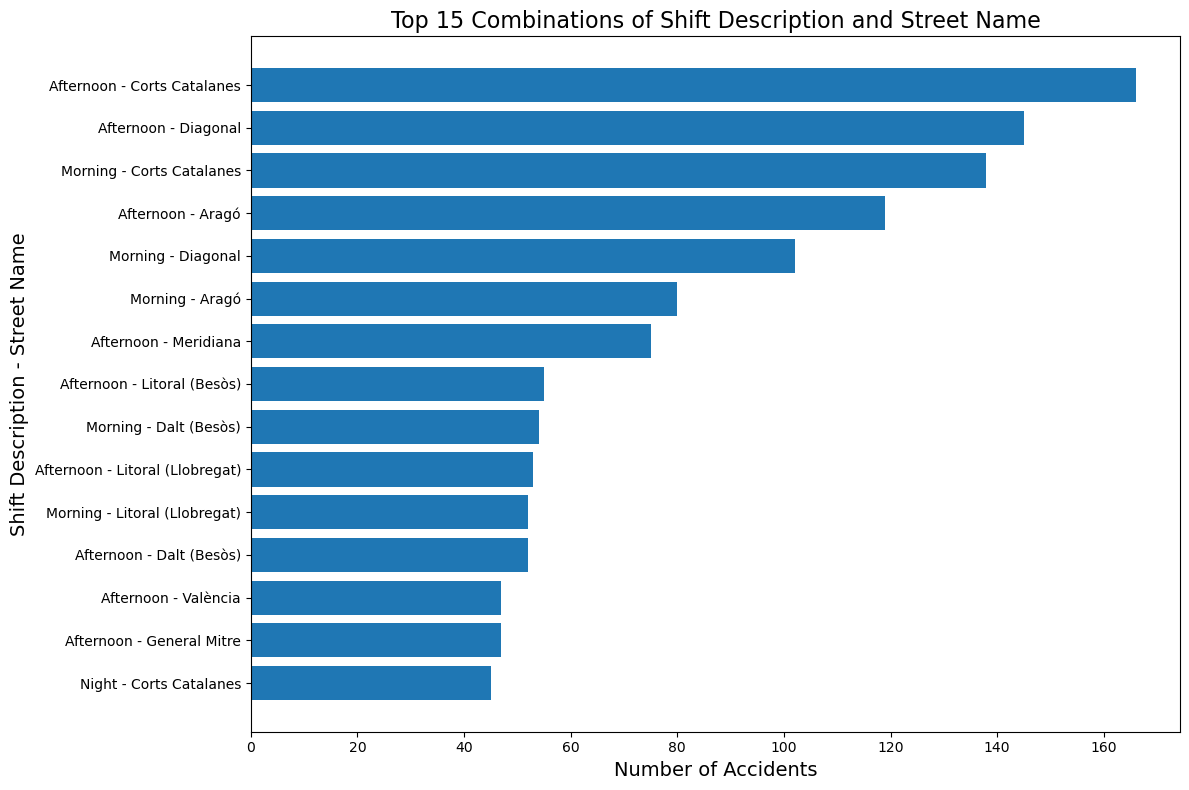

In [36]:
# Count occurrences of Shift_Description and Street_Name combinations
shift_street_counts = accidents_by_cause2020.groupby(['Shift_Description', 'Street_Name']).size().reset_index(name='Count')

# Sort the data to focus on the most frequent combinations
shift_street_counts = shift_street_counts.sort_values(by='Count', ascending=False).head(15)

# Plot a bar chart of the top 15 Shift_Description and Street_Name combinations
plt.figure(figsize=(12, 8))
plt.barh(
    shift_street_counts['Shift_Description'] + ' - ' + shift_street_counts['Street_Name'],
    shift_street_counts['Count']
)
plt.title('Top 15 Combinations of Shift Description and Street Name', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Shift Description - Street Name', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.tight_layout()
plt.show()


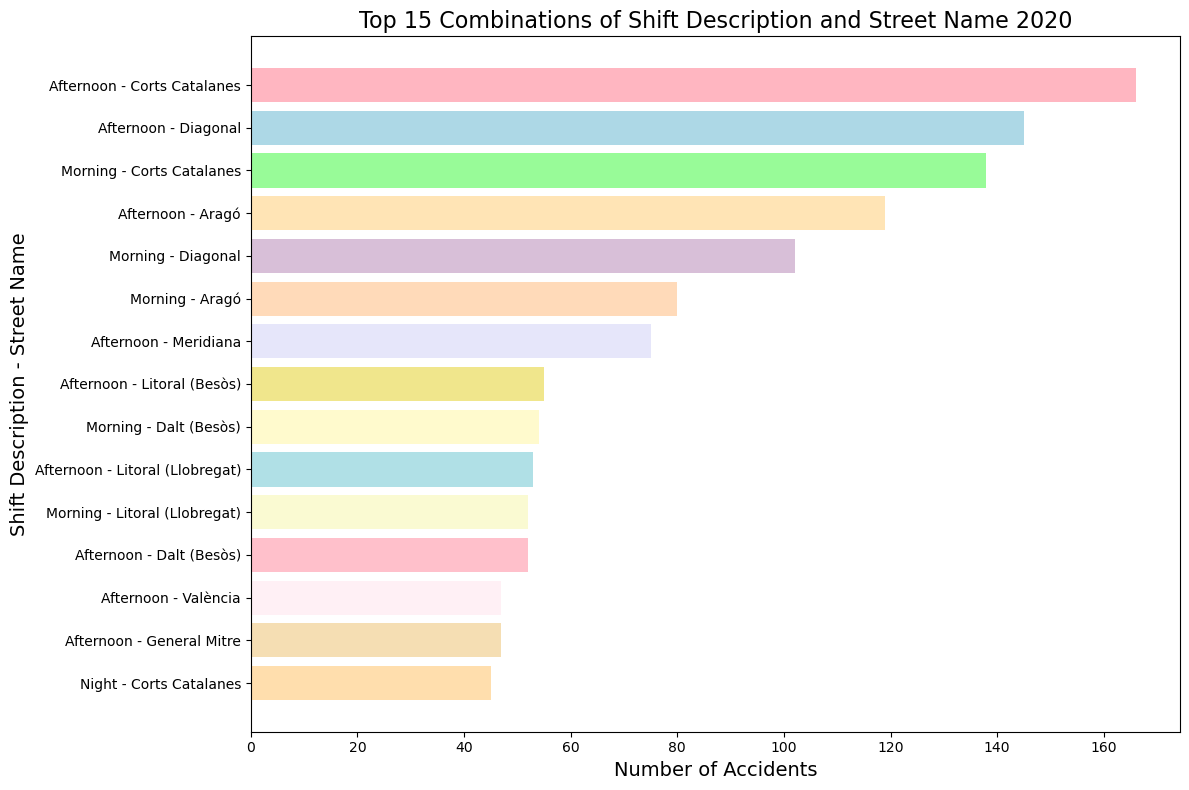

In [23]:
# Define true pastel colors for the chart
pastel_colors = [
    '#FFB6C1',  # Light Pink
    '#ADD8E6',  # Light Blue
    '#98FB98',  # Pale Green
    '#FFE4B5',  # Moccasin
    '#D8BFD8',  # Thistle
    '#FFDAB9',  # Peach Puff
    '#E6E6FA',  # Lavender
    '#F0E68C',  # Khaki
    '#FFFACD',  # Lemon Chiffon
    '#B0E0E6',  # Powder Blue
    '#FAFAD2',  # Light Goldenrod Yellow
    '#FFC0CB',  # Pink
    '#FFF0F5',  # Lavender Blush
    '#F5DEB3',  # Wheat
    '#FFDEAD'   # Navajo White
]

# Plot a bar chart of the top 15 Shift_Description and Street_Name combinations with pastel colors
plt.figure(figsize=(12, 8))
plt.barh(
    shift_street_counts['Shift_Description'] + ' - ' + shift_street_counts['Street_Name'],
    shift_street_counts['Count'],
    color=pastel_colors[:len(shift_street_counts)]
)
plt.title('Top 15 Combinations of Shift Description and Street Name 2020', fontsize=16)
plt.xlabel('Number of Accidents', fontsize=14)
plt.ylabel('Shift Description - Street Name', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the highest count on top
plt.tight_layout()
plt.show()



In [14]:
# Aggregate the counts of occurrences for each coordinate pair (latitude and longitude)
coordinate_counts = accidents_by_cause2020.groupby(['Latitud', 'Longitud']).size().reset_index(name='Count')

# Find the coordinate with the highest count
most_frequent_coordinate = coordinate_counts.nlargest(1, 'Count')

# Display the result
print(most_frequent_coordinate)



       Latitud  Longitud  Count
790  41.384036  2.148291     15


In [15]:
top_5_frequent_coordinates = accidents_by_cause2020[['Latitud', 'Longitud']].value_counts().head(5).reset_index(name='Count')

In [16]:
top_5_frequent_coordinates

,Latitud,Longitud,Count
0,41.384036,2.148291,15
1,41.392618,2.138226,15
2,41.391737,2.162972,14
3,41.400957,2.182301,14
4,41.389090,2.166454,12


In [17]:
map_top_5 = folium.Map(location=[41.3851, 2.1734], zoom_start=12)  # Example: Centered on Barcelona

# Add markers for the top 5 most frequent coordinates
for index, row in top_5_frequent_coordinates.iterrows():
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=f"Accidents: {row['Count']}",
    ).add_to(map_top_5)

# Display the map
map_top_5
                                                                                #top 5 most frequent points 

In [82]:
# Find the most popular day of the week
most_popular_day = accidents_by_cause2020['Day_of_Week'].value_counts().idxmax()
most_popular_day_count = accidents_by_cause2020['Day_of_Week'].value_counts().max()

# Find the most popular time of day
most_popular_time = accidents_by_cause2020['Hour_of_Day'].value_counts().idxmax()
most_popular_time_count = accidents_by_cause2020['Hour_of_Day'].value_counts().max()

# Display the results
print(f"The most popular day of the week for accidents is {most_popular_day} with {most_popular_day_count} accidents.")
print(f"The most popular time of day for accidents is {most_popular_time}:00 with {most_popular_time_count} accidents.")


The most popular day of the week for accidents is Thursday with 1101 accidents.
The most popular time of day for accidents is 14:00 with 503 accidents.


In [83]:
# Count the number of accidents on Thursday at 14:00
accidents_on_thursday_14 = accidents_by_cause2020[
    (accidents_by_cause2020['Day_of_Week'] == 'Thursday') &
    (accidents_by_cause2020['Hour_of_Day'] == 14)
].shape[0]

# Display the result
print(f"The number of accidents on Thursday at 14:00 is {accidents_on_thursday_14}.")


The number of accidents on Thursday at 14:00 is 95.


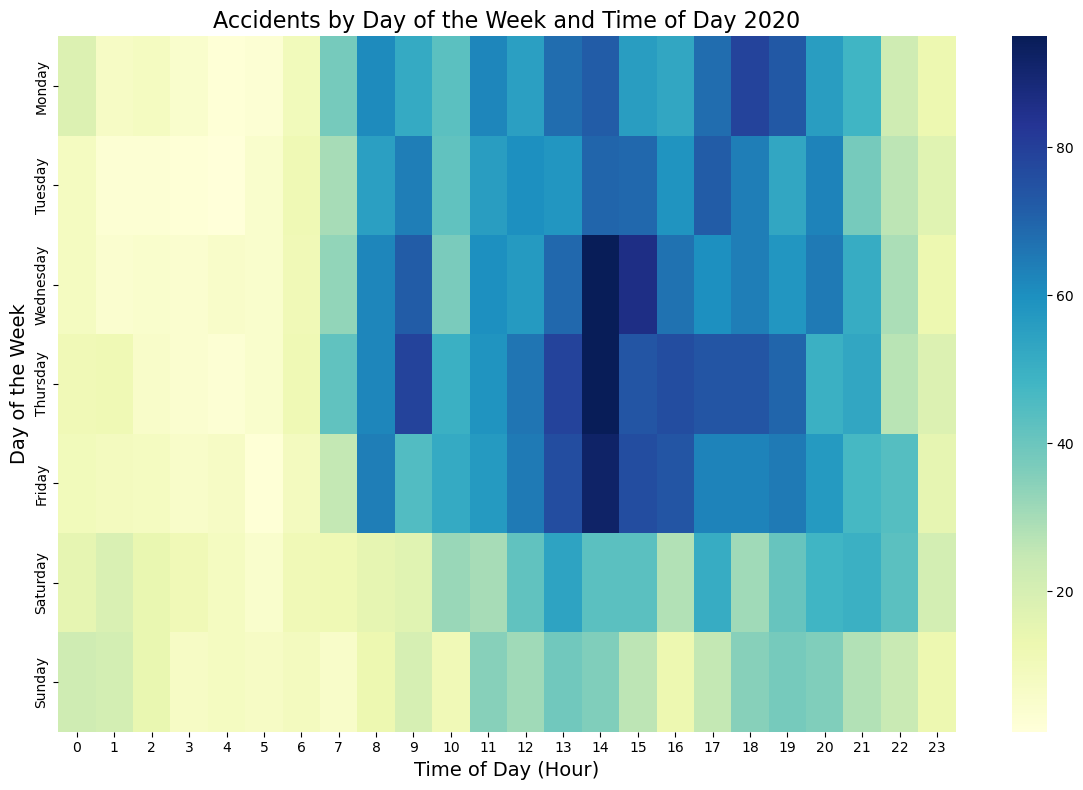

In [18]:
accidents_pivot = accidents_by_cause2020.pivot_table(
    index='Day_of_Week', 
    columns='Hour_of_Day', 
    values='Case_Number', 
    aggfunc='count'
)

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_pivot = accidents_pivot.reindex(days_order)

# Plot a heatmap of accidents by day of the week and time
plt.figure(figsize=(12, 8))
sns.heatmap(accidents_pivot, cmap="YlGnBu", annot=False, cbar=True)

plt.title('Accidents by Day of the Week and Time of Day 2020', fontsize=16)
plt.xlabel('Time of Day (Hour)', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.tight_layout()
plt.show()

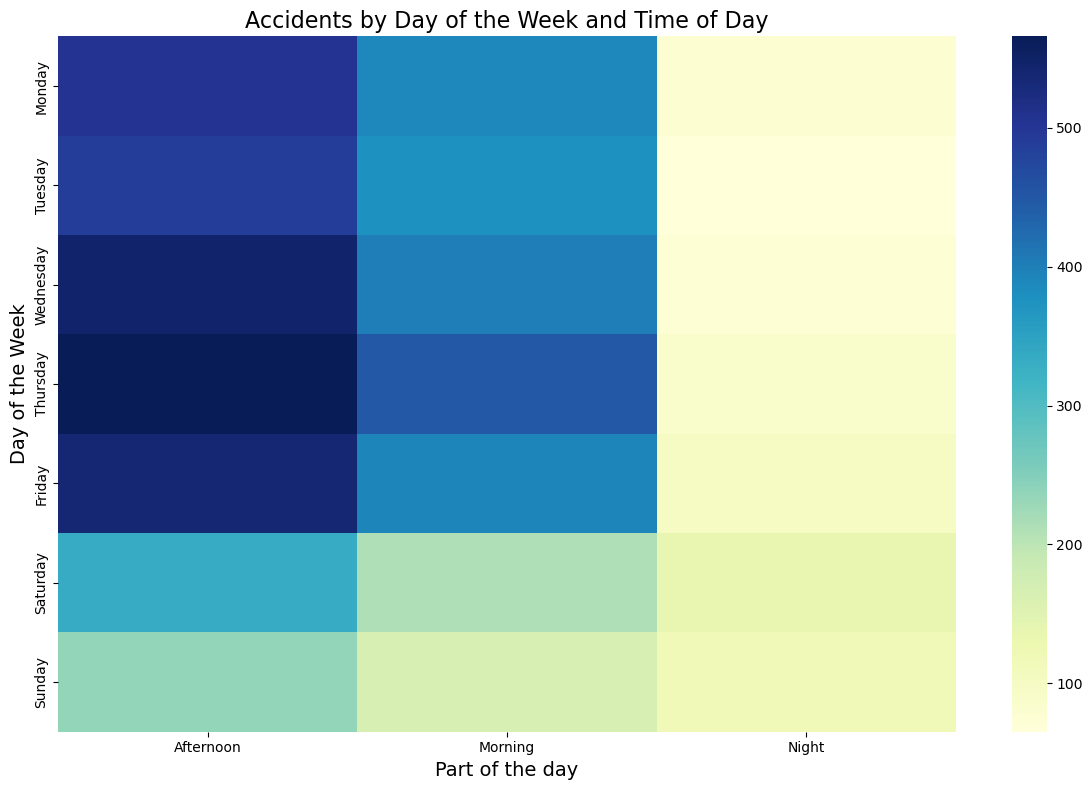

In [86]:
accidents_pivot = accidents_by_cause2020.pivot_table(
    index='Day_of_Week', 
    columns='Shift_Description', 
    values='Case_Number', 
    aggfunc='count'
)

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_pivot = accidents_pivot.reindex(days_order)

# Plot a heatmap of accidents by day of the week and time
plt.figure(figsize=(12, 8))
sns.heatmap(accidents_pivot, cmap="YlGnBu", annot=False, cbar=True)

plt.title('Accidents by Day of the Week and Time of Day', fontsize=16)
plt.xlabel('Part of the day', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.tight_layout()
plt.show()